In [9]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [10]:
file = open('benchmark.json')
df = pd.DataFrame(json.load(file)["benchmarks"])
df = df[df['run_type']=='iteration']
df = df[df['family_index'] == 0]
splitted = df["run_name"].str.split("/")
df["size"] = splitted.str[1].astype(int)
df["prob"] = splitted.str[2].astype(int)
df["components"] = splitted.str[3].astype(int)
df = df[["size", "prob", "components", "cpu_time"]]

(0.0, 100000000.0)

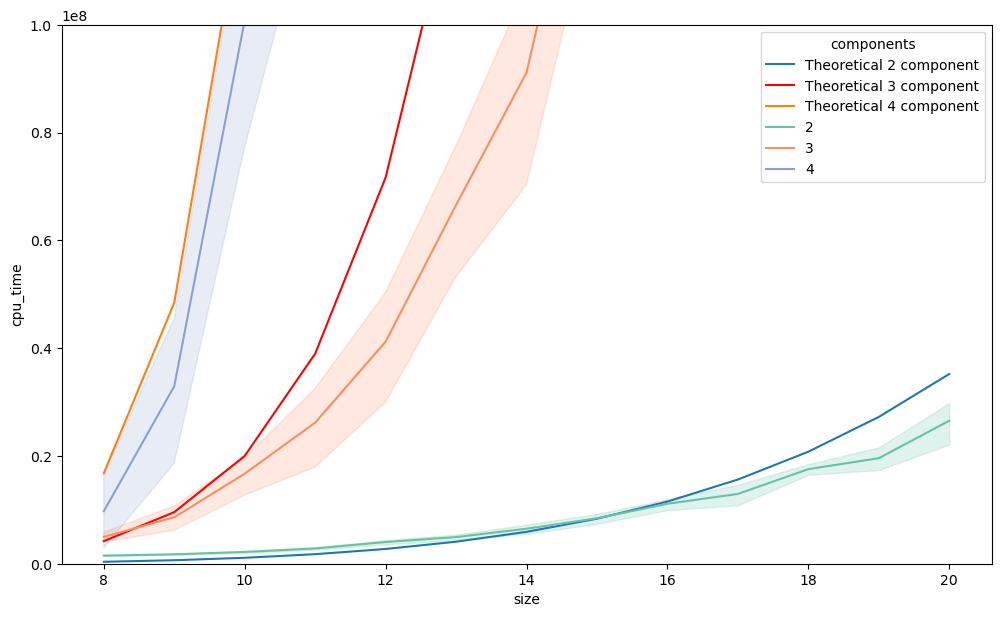

In [45]:
plt.figure(figsize=(12,7))
scatter = np.arange(8, 20.5, 1)
sns.lineplot(x = scatter, y = 11 * scatter**5, label = "Theoretical 2 component")
sns.lineplot(x = scatter, y = 2 * scatter**7, label = "Theoretical 3 component", c="r")
sns.lineplot(x = scatter, y = 1/8 * scatter**9, label = "Theoretical 4 component")


sns.lineplot(df, x="size", y="cpu_time", hue="components", palette="Set2")
plt.ylim(0,1e8)